# Predicting used car prices

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Import dataset

In [2]:
data = pd.read_csv(r"C:\Users\manit\OneDrive\Documents\GitHub\used-vehicle-price-prediction-data-science\dataset.csv")
data.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1166,1166,Hyundai Xcent 1.2 Kappa SX,Kolkata,2016,32000,Petrol,Manual,First,19.1 kmpl,1197 CC,82 bhp,5.0,NaN,3.60
5203,5203,Volkswagen Polo Diesel Highline 1.2L,Chennai,2017,26969,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,6.90
2924,2924,Land Rover Range Rover HSE Dynamic,Kochi,2018,41661,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,44.83
1353,1353,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Ahmedabad,2013,60000,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,7.0,NaN,7.90
5276,5276,Mercedes-Benz CLA 200 D Sport Edition,Ahmedabad,2015,13500,Diesel,Automatic,First,17.9 kmpl,2143 CC,136 bhp,5.0,NaN,25.51


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


* most of the column dataTypes are 'object' data type, we will extract the info and convert it to required dataTypes

In [4]:
data.shape

(6019, 14)

## Data Cleaning

**as the new_price column has many null values we are going to drop that column**

In [5]:
data.drop(["New_Price", "Unnamed: 0"], axis=1, inplace=True)
data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [6]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

**let's not drop the rows in the dataset with missing values, as we fill with the mean of those values**

## Test Train Split
* 70% as train data and 30% as test data
* training data is used to train the machine learning models and test data is used to check the accuracy of the model

In [7]:
dataFrame = data.iloc[:,:-1]
target = data.iloc[:,-1] # selects the last column

In [8]:
X_train, X_test, ytrain, ytest = train_test_split(dataFrame, target, test_size = 0.3, random_state = 8)

In [9]:
X_train.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
3648,Honda Jazz V CVT,Mumbai,2017,17978,Petrol,Automatic,First,19.0 kmpl,1199 CC,88.7 bhp,5.0
2835,BMW 5 Series 2013-2017 520d Luxury Line,Bangalore,2015,14000,Diesel,Automatic,First,18.12 kmpl,1995 CC,190 bhp,5.0
842,BMW X5 2014-2019 xDrive 30d Design Pure Experi...,Mumbai,2014,47000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,7.0
1156,Volkswagen Polo 1.2 MPI Highline,Bangalore,2014,62000,Petrol,Manual,First,16.47 kmpl,1198 CC,74 bhp,5.0
202,Hyundai i20 Asta Option 1.2,Kochi,2016,61012,Petrol,Manual,First,18.6 kmpl,1197 CC,81.83 bhp,5.0


In [10]:
# y_train holds the target training data
ytrain.head(5)

3648     6.95
2835    35.00
842     41.50
1156     5.35
202      6.00
Name: Price, dtype: float64

## Pre-Processing and analyzing the data
* Let's explore the various columns and extract the required information for our prediction

### Name
**Let's explore the various cars in the dataset**

In [11]:
X_train["Name"].value_counts()

Maruti Swift VDI                    34
Mahindra XUV500 W8 2WD              33
Honda City 1.5 S MT                 26
Hyundai i10 Sportz                  24
Hyundai Grand i10 Sportz            24
                                    ..
Chevrolet Optra 1.6 LS               1
Hyundai Xcent 1.1 CRDi SX Option     1
Mercedes-Benz SLK-Class 55 AMG       1
Maruti Celerio ZXI AT Optional       1
BMW 3 Series 330 Ci Convertible      1
Name: Name, Length: 1573, dtype: int64

* we can say that there are several cars in the dataset, some of them with a count > 1

#### from the test-train data we extract the manufactures' data

In [12]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)
make_train[0].head(4)

3648         Honda
2835           BMW
842            BMW
1156    Volkswagen
Name: 0, dtype: object

In [13]:
# make_train[0] will have list of car names, using this data we create a new column manufacturers
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]
X_train.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
3648,Honda Jazz V CVT,Mumbai,2017,17978,Petrol,Automatic,First,19.0 kmpl,1199 CC,88.7 bhp,5.0,Honda
2835,BMW 5 Series 2013-2017 520d Luxury Line,Bangalore,2015,14000,Diesel,Automatic,First,18.12 kmpl,1995 CC,190 bhp,5.0,BMW
842,BMW X5 2014-2019 xDrive 30d Design Pure Experi...,Mumbai,2014,47000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,7.0,BMW
1156,Volkswagen Polo 1.2 MPI Highline,Bangalore,2014,62000,Petrol,Manual,First,16.47 kmpl,1198 CC,74 bhp,5.0,Volkswagen


* Let's identify all unique columns and the count of cars from each manufacturers

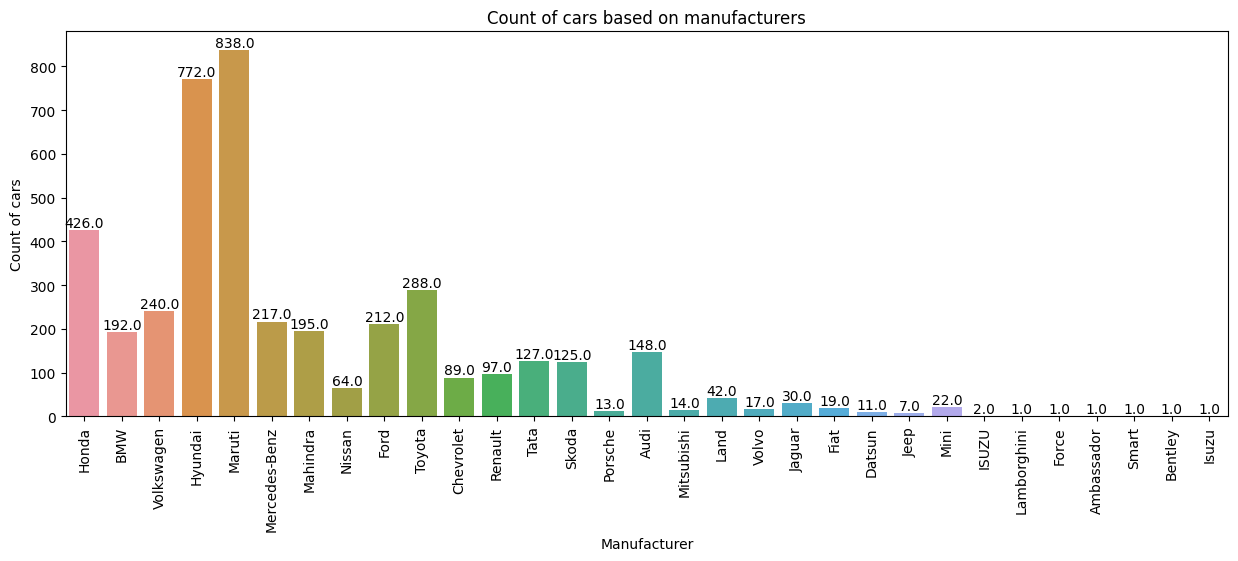

In [14]:
plt.figure(figsize = (15, 5))
plot = sns.countplot(x = 'Manufacturer', data = X_train, )

for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

# labels
plt.xticks(rotation = 90) 
plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")
plt.show()

* from the above plot we can infer that Maximum cars in the dataset are by the manufactured **Maruti**
* Let's drop the `Name` column, as it's not required further in our prediction

In [15]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)
X_train.head(4)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
3648,Mumbai,2017,17978,Petrol,Automatic,First,19.0 kmpl,1199 CC,88.7 bhp,5.0,Honda
2835,Bangalore,2015,14000,Diesel,Automatic,First,18.12 kmpl,1995 CC,190 bhp,5.0,BMW
842,Mumbai,2014,47000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,7.0,BMW
1156,Bangalore,2014,62000,Petrol,Manual,First,16.47 kmpl,1198 CC,74 bhp,5.0,Volkswagen


### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [16]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [17]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

# as the price may vary with respect to the age of the car, so we calculate how much old the car is 

X_train.sample(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
5215,9,28232,Petrol,Manual,Second,15.8 kmpl,1499 CC,110 bhp,5.0,Ford
5979,7,25000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,ISUZU
5405,10,58000,Diesel,Automatic,First,12.07 kmpl,2967 CC,241.4 bhp,7.0,Audi
3255,8,17000,Petrol,Manual,First,21.4 kmpl,1197 CC,83.1 bhp,5.0,Maruti
2476,10,77795,Diesel,Manual,First,12.99 kmpl,2494 CC,100.6 bhp,8.0,Toyota


## Mileage

We need to extract the numerical value out of each string and save it in the column, as the units of the data aren't required fot our analysis

In [18]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')
mileage_train[0] # consists of the value of mileage of the cars

3648     19.0
2835    18.12
842     15.97
1156    16.47
202      18.6
        ...  
2181     19.7
2409     13.2
2033    16.78
1364     24.2
4547     25.8
Name: 0, Length: 4213, dtype: object

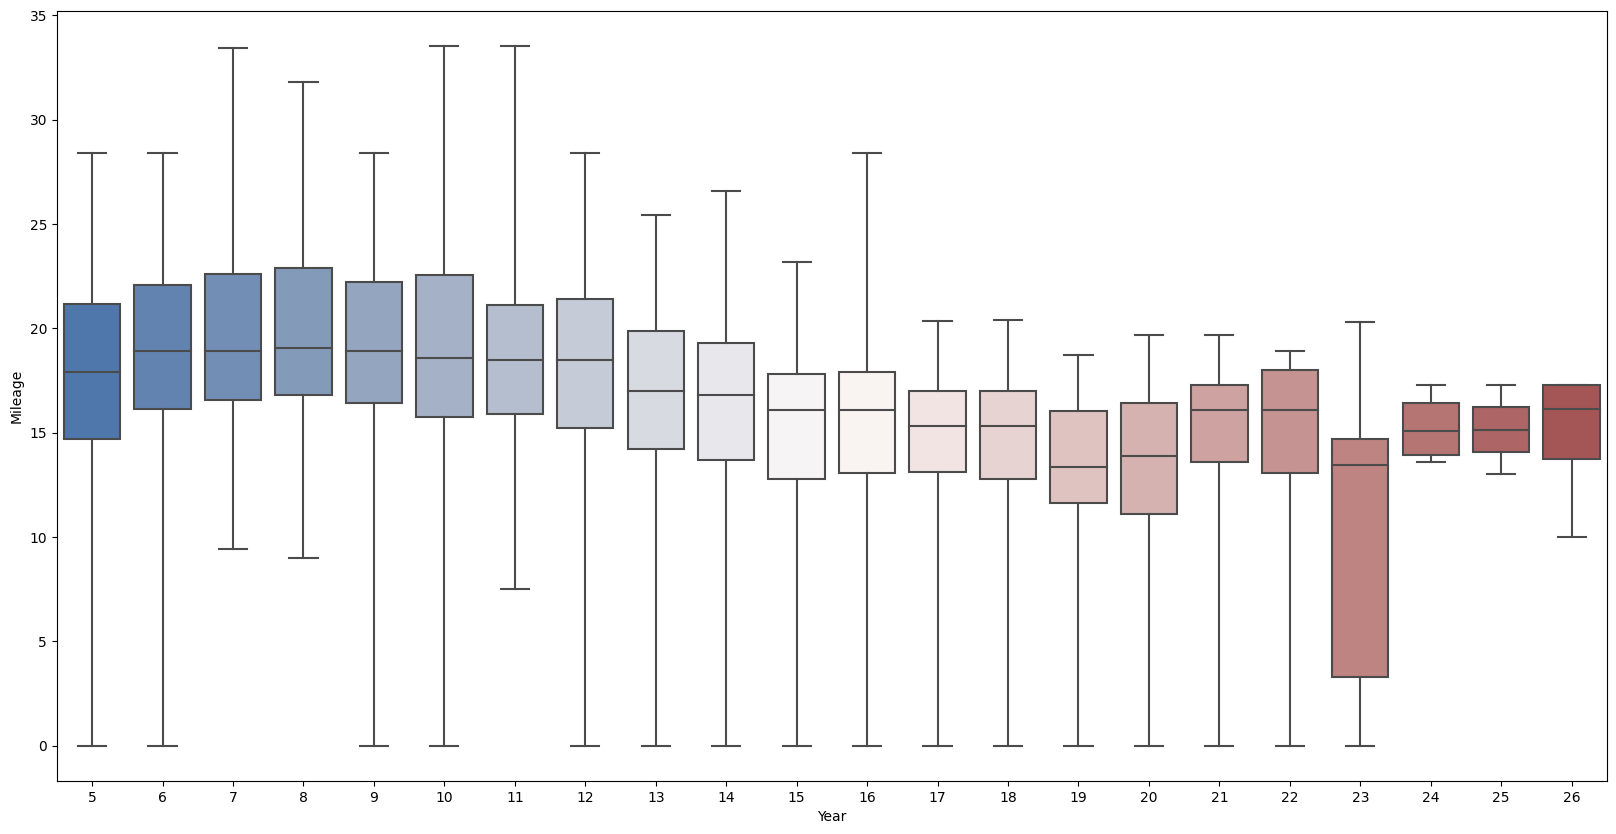

In [19]:
# Mileage vs age of the car
plt.figure(figsize=(20,10))
ml = X_train["Mileage"]
yr = X_train["Year"]
sns.boxplot(x=yr, y=ml,
            data=data,
            whis=[0, 100],
            width=.8,
            palette="vlag")

plt.show()

### Engine, Power and Seats
* Removing the units of the recorded data, as they aren't needed for our prediction
* The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so remove `bhp` from it.

In [20]:
X_train.head(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
3648,7,17978,Petrol,Automatic,First,19.00,1199 CC,88.7 bhp,5.0,Honda
2835,9,14000,Diesel,Automatic,First,18.12,1995 CC,190 bhp,5.0,BMW
842,10,47000,Diesel,Automatic,First,15.97,2993 CC,258 bhp,7.0,BMW
1156,10,62000,Petrol,Manual,First,16.47,1198 CC,74 bhp,5.0,Volkswagen
202,8,61012,Petrol,Manual,First,18.60,1197 CC,81.83 bhp,5.0,Hyundai


In [21]:
# value of engine volume value is extracted, as we dont want the units
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)

# now we convert the dataframe into series, and updating the engine column
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

In [22]:
# similarly we do it for power column
bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)

X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [23]:
# Checking for null values
print("train: "+str(sum(X_train["Engine"].isnull())))
print("test: "+str(sum(X_test["Engine"].isnull())))

train: 23
test: 13


Now, filling the null values present in  `engine` , `power`, `seats`,`Mileage` columns with the mean of other data in the same column 

In [24]:
# filling the null valued data with the mean of other data in the same column
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)


X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

In [25]:
# Checking for null values
print("train: "+str(sum(X_train["Engine"].isnull())))
print("test: "+str(sum(X_test["Engine"].isnull())))

train: 0
test: 0


### Kilometers Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [26]:
X_train["Kilometers_Driven"].head()

3648    17978
2835    14000
842     47000
1156    62000
202     61012
Name: Kilometers_Driven, dtype: int64

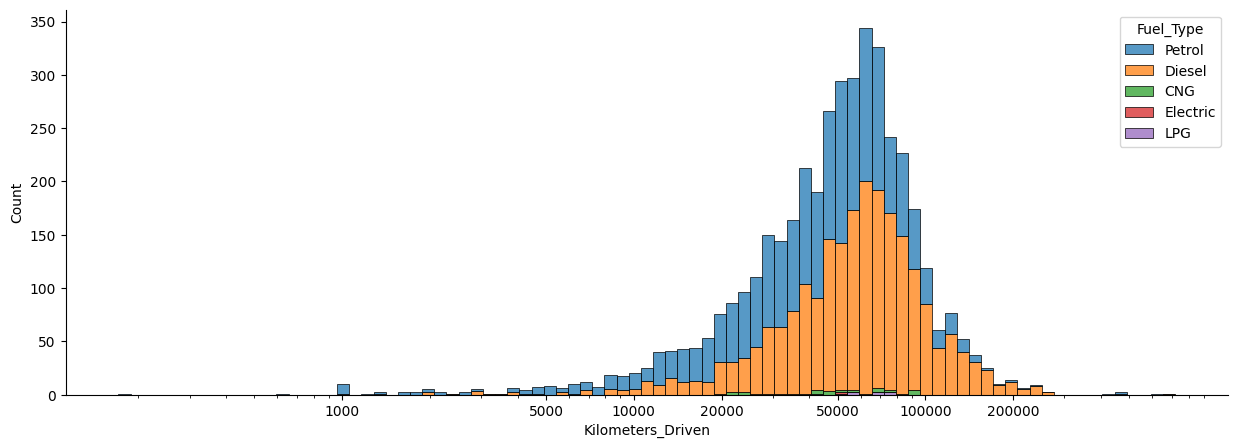

In [27]:
import matplotlib as mpl
kmd = X_train["Kilometers_Driven"]
ft = X_train["Fuel_Type"]
tr = X_train["Transmission"]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    X_train,
    x="Kilometers_Driven", hue="Fuel_Type",
    multiple="stack",
    linewidth=.5,
    log_scale=True,
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1000,5000,10000, 20000, 50000,100000, 200000])

plt.show()

* As the data range is really varied and the high values might affect prediction.
* thus, it is really important that scaling be applied to this column to make sure the data is balanced

## Data Processing

* Now that we have worked with the training data, let's create dummy columns for categorical columns using one-hot encoding before we begin training.
* **One hot encoding** is a technique that we use to represent **categorical variables as numerical values** in a machine learning model.

In [28]:
X_train.head(4)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
3648,7,17978,Petrol,Automatic,First,19.00,1199.0,88.7,5.0,Honda
2835,9,14000,Diesel,Automatic,First,18.12,1995.0,190.0,5.0,BMW
842,10,47000,Diesel,Automatic,First,15.97,2993.0,258.0,7.0,BMW
1156,10,62000,Petrol,Manual,First,16.47,1198.0,74.0,5.0,Volkswagen


In [29]:
X_train_copy = X_train.copy()
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_train.sample(5)

#the manufacturer column is categorized 

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,...,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
8,11,64430,20.54,1598.0,103.60,5.0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
5685,11,77000,23.20,1248.0,73.94,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5671,6,20026,19.00,1199.0,88.70,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
680,18,98293,13.80,1299.0,70.00,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4894,7,24000,27.39,1248.0,74.00,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


similarly we create the dummy columns for X_test data also

In [30]:
X_test.head(4)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
748,17,71297,Petrol,Manual,First,17.00,1086.0,113.221632,5.0,Hyundai
5243,14,62000,Petrol,Manual,First,20.36,1197.0,78.900000,5.0,Hyundai
2307,16,68000,Petrol,Manual,Third,19.70,796.0,46.300000,5.0,Maruti
4717,9,23000,Petrol,Manual,First,19.10,1197.0,82.000000,5.0,Hyundai


In [31]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_test.sample(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_BMW,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,...,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4538,14,110009,17.67,1968.0,138.08,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
235,5,14165,11.36,2755.0,171.50,7.0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4552,17,74199,16.07,1995.0,181.00,5.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1434,10,36000,26.00,1498.0,98.60,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2068,17,55000,13.20,1495.0,94.00,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [32]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

### lets create a custom dataset for model prediction

In [33]:
temp = pd.DataFrame(X_train.iloc[1,:]) #get a temp data
temp = temp.transpose()
temp

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,...,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
2835,9.0,14000.0,18.12,1995.0,190.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training and predicting

`Standardizing the data`
* StandardScaler is a preprocessing technique used in machine learning to standardize the features of a dataset, to ensure the data are in same scale for modeling
* its done by removing the mean and scales each variable to unit variance

In [34]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

* so now we will create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions
* and compare the score of the two models

In [35]:
X_test.shape

(1806, 44)

#### applying linear regression

In [36]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, ytrain)
y_pred = linearRegression.predict(X_test)
# r2_score is a measurement done to check the goodness and fit of the model
print(r2_score(ytest, y_pred))

0.6851059616536127


In [37]:
temp

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,...,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
2835,9.0,14000.0,18.12,1995.0,190.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
custom=standardScaler.fit(temp)

In [ ]:
pred

In [ ]:
#plots and labels
plt.figure(figsize=(8,5))
plt.title("y_test data vs y_predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(ytest, y_pred)
plt.show()

The `Linear regression` model performed the best with a R2 score of approx **0.768**

#### applying random forest algorithm

In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, ytrain)
y_pred = rf.predict(X_test)
print(r2_score(ytest, y_pred))

In [ ]:
#plot and labels
plt.figure(figsize=(8,5))
plt.title("y_test data vs y_predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(ytest, y_pred)
plt.show()

The `Random Forest` model performed the best with a R2 score of approx **0.909**.

In [ ]:
import ipywidgets as widgets
wid= widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=900000.0,
    step=0.1,
    description='KM driven:',
    disabled=False
)
wid

In [ ]:
wid.value